<a href="https://colab.research.google.com/github/chunt4/cv-piano/blob/main/cvpiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

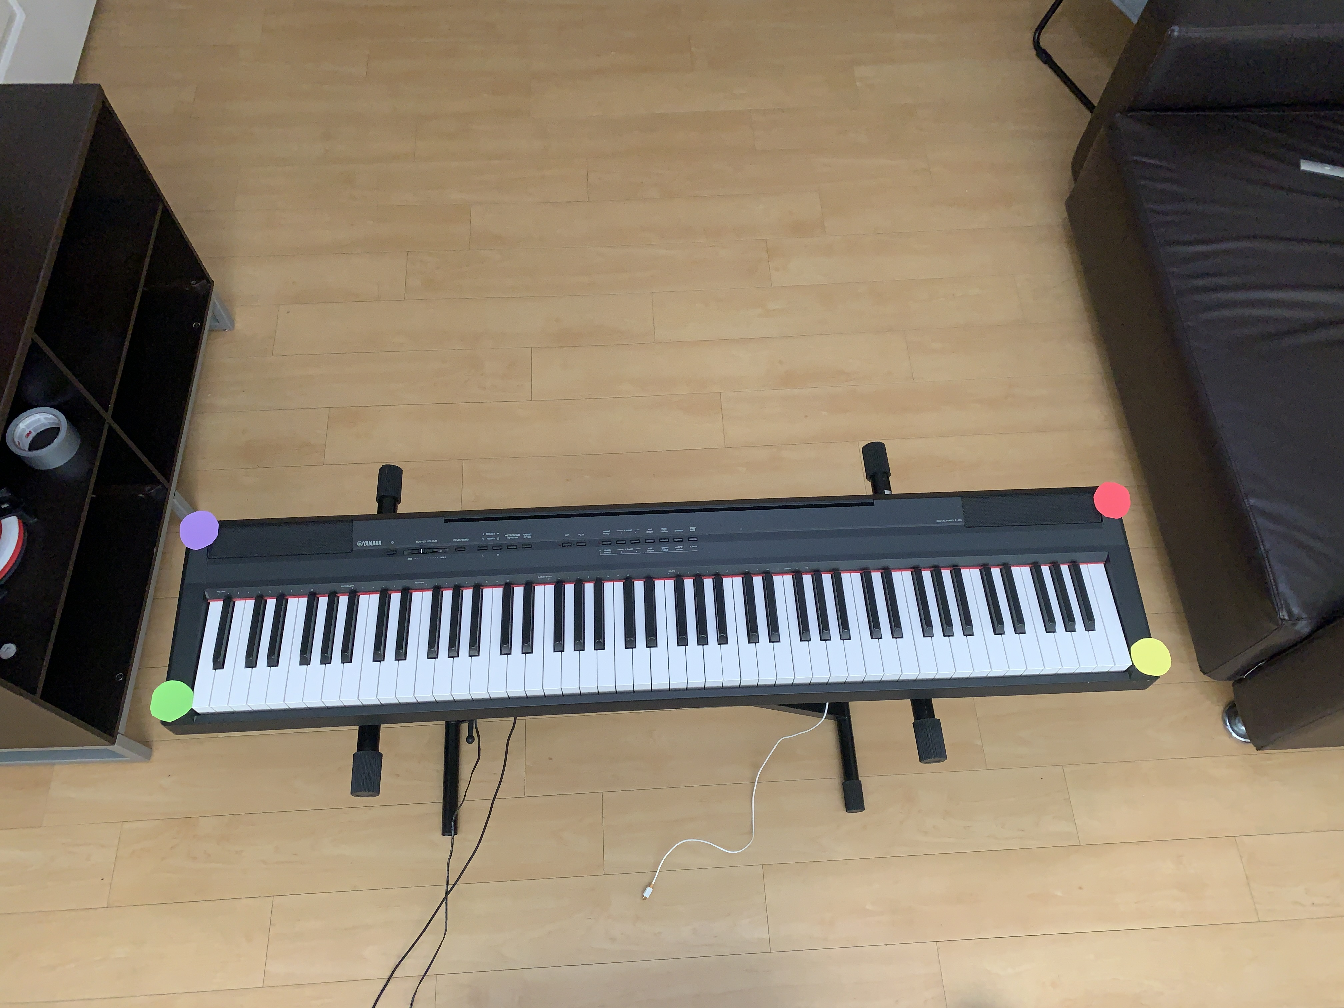

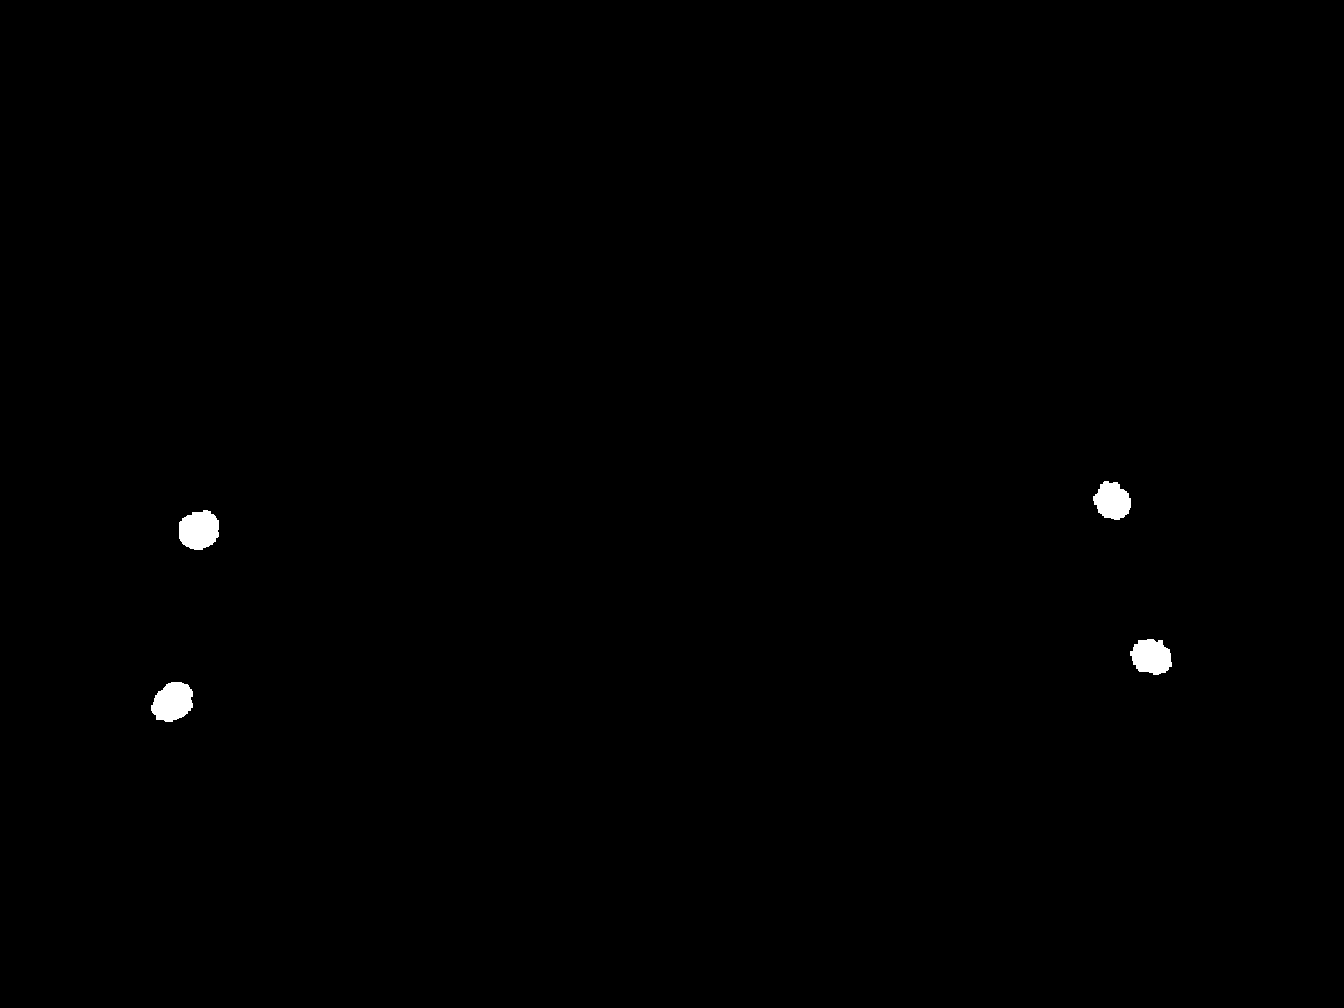

(500.57998129092607, 1112.000935453695)
(529.7086614173228, 198.5716535433071)
(656.3963254593176, 1150.9781277340333)
(701.6106264869152, 172.33227597145122)


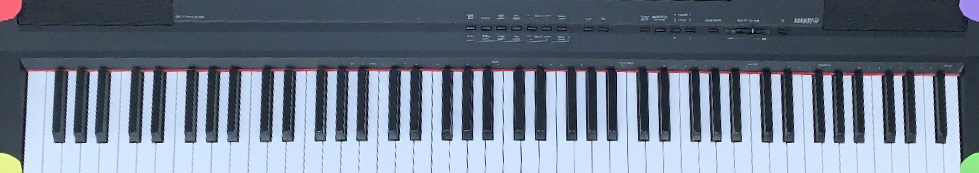

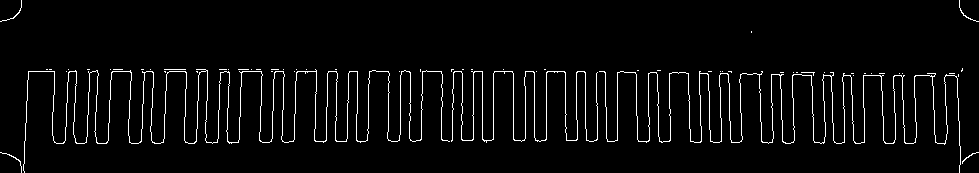

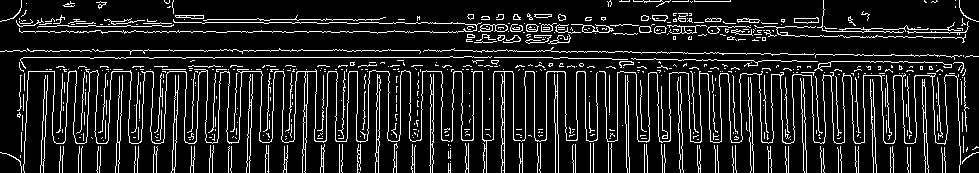

In [59]:
# Mounted on chunt4's Google Drive

# Training data path:/content/drive/MyDrive/Computer Vision Semester Project/Data Collection/Training

# Unknown testing path:/content/drive/MyDrive/Computer Vision Semester Project/Data Collection/Unknown Testing

# Validation path:/content/drive/MyDrive/Computer Vision Semester Project/Data Collection/Validation

import cv2
import numpy as np
from skimage import measure
from google.colab import drive
from google.colab.patches import cv2_imshow

# Dan import
#img = cv2.imread('/content/gdrive/My Drive/Computer Vision Semester Project/IMG_2627.JPG')

# Chris import
img = cv2.imread('/content/drive/My Drive/Computer Vision Semester Project/Data Collection/Training/IMG_2627.JPG')

# Adjust initial image
height, width, channels = img.shape
img = cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
img = cv2.resize(img, (int(height/3), int(width/3)))
cv2_imshow(img)

### 1. Use HSVSelection Color Extraction and Morphological Operations to Locate Colored Stickers

# Extract RGB values of 4 colored stickers
#Lower left corner
lowerGreen = np.array([135,230,144])
upperGreen = np.array([141,237,149])
objmaskGreen = cv2.inRange(img, lowerGreen, upperGreen)

#Upper left corner
lowerPurple = np.array([234,135,159])
upperPurple = np.array([240,142,166])
objmaskPurple = cv2.inRange(img, lowerPurple, upperPurple)

#Lower right corner
lowerYellow = np.array([142,241,230])
upperYellow = np.array([147,245,234])
objmaskYellow = cv2.inRange(img, lowerYellow, upperYellow)

#Upper right corner
lowerRed = np.array([120,100,249])
upperRed = np.array([125,105,253])
objmaskRed = cv2.inRange(img, lowerRed, upperRed)

#Combine masks and morph close and dilate
mask = objmaskPurple + objmaskRed + objmaskGreen + objmaskYellow
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel=kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel=kernel)
cv2_imshow(mask)

### 2. Extract Coordinates and Determine ROI

# Skimage Measure
labels = measure.label(mask)
properties = measure.regionprops(labels)

# Grab centroids of all corners
centroids = []
for prop in properties:
  print(prop.centroid)
  centroids.append(prop.centroid)

### 3. Use Image Warping to Straighten Image and Align Image Corners with Centroids

# Adjust centroids array to prepare for warping
centroids = [[centroids[1][1], centroids[1][0]], [centroids[0][1], centroids[0][0]], [centroids[2][1], centroids[2][0]], [centroids[3][1], centroids[3][0]]]

# Use L2 Normalization to determine image width and length
width_AD = np.sqrt(((centroids[0][0] - centroids[3][0]) ** 2) + ((centroids[0][1] - centroids[3][1]) ** 2))
width_BC = np.sqrt(((centroids[1][0] - centroids[2][0]) ** 2) + ((centroids[1][1] - centroids[2][1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))
height_AB = np.sqrt(((centroids[0][0] - centroids[1][0]) ** 2) + ((centroids[0][1] - centroids[1][1]) ** 2))
height_CD = np.sqrt(((centroids[2][0] - centroids[3][0]) ** 2) + ((centroids[2][1] - centroids[3][1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))

# print(maxWidth)
# print(maxHeight)

# Specify mappings of source and destination images
input_pts = np.float32(centroids)
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])

# Compute transformation matrix
H_mat = cv2.getPerspectiveTransform(input_pts,output_pts)

# Apply perspective transformation to get final warped image
img_warped = cv2.warpPerspective(img, H_mat, (maxWidth, maxHeight), flags=cv2.INTER_LINEAR)
img = cv2.rotate(img_warped, cv2.cv2.ROTATE_90_CLOCKWISE)

cv2_imshow(img)

### 4. Use Edge Detection to Detect Keys
blurred = cv2.GaussianBlur(img, (5, 5), 0)
black_keys = cv2.Canny(image=blurred, threshold1=220, threshold2=250) # Canny Edge Detection
cv2_imshow(black_keys)
all_keys = cv2.Canny(image=blurred, threshold1=10, threshold2=25) # Canny Edge Detection
cv2_imshow(all_keys)

# EOF


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
